# Exercise 1 

In this exercise, we will practice applying a denoising encoder using the `MNIST` dataset.

### Exercise 1(a) (5 points)

Load the below libraries and the `MNIST` dataset.

```
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

from tensorflow.keras.datasets import mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
filters = [32, 32, 16]
```

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

from tensorflow.keras.datasets import mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
filters = [32, 32, 16]

### Exercise 1(b) (5 points)

Load the `MNIST` data, and visualize the first 10 images from the `train` and `test` data sets.

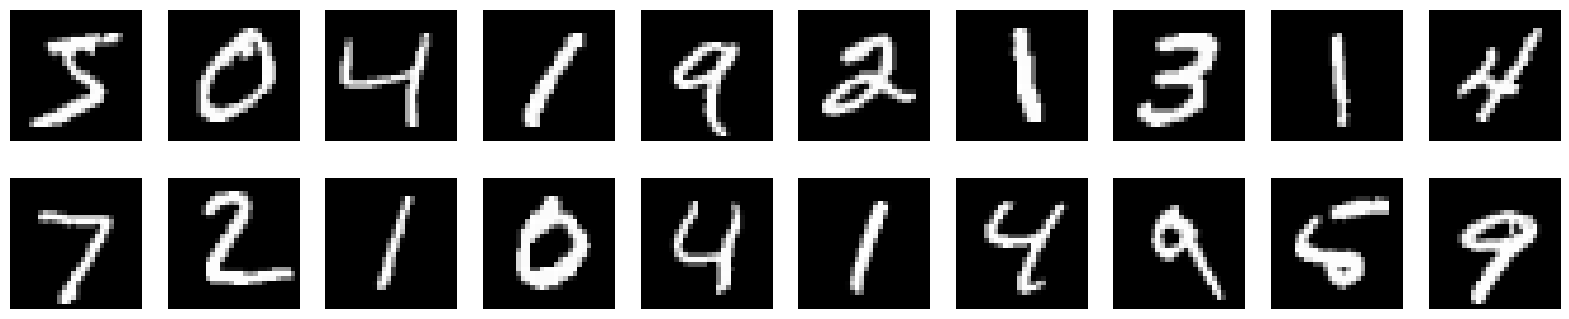

In [15]:
(x_train, _), (x_test, _) = mnist.load_data()

n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

### Exercise 1(c) (3 points)

Normalize the data by dividing by 255. Then, reshape the data.

In [16]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#reshaping the input data
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

### Exercise 1(d) (3 points)

Add noise to the `train` and `test` data sets.

In [17]:
#adding noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Exercise 1(e) (10 points)

Define the convolutional autoencoder for removing noise.

In [18]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(Encoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.pool = MaxPooling2D((2, 2), padding='same')
               
    
    def call(self, input_features):
        x = self.conv1(input_features)
        #print("Ex1", x.shape)
        x = self.pool(x)
        #print("Ex2", x.shape)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.pool(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(Decoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='valid')
        self.conv4 = Conv2D(1, 3, 1, activation='sigmoid', padding='same')
        self.upsample = UpSampling2D((2, 2))
  
    def call(self, encoded):
        x = self.conv1(encoded)
        #print("dx1", x.shape)
        x = self.upsample(x)
        #print("dx2", x.shape)
        x = self.conv2(x)
        x = self.upsample(x)
        x = self.conv3(x)
        x = self.upsample(x)
        return self.conv4(x)
    
class Autoencoder(tf.keras.Model):
    def __init__(self, filters):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(filters)
        self.decoder = Decoder(filters)

    def call(self, input_features):
        #print(input_features.shape)
        encoded = self.encoder(input_features)
        #print(encoded.shape)
        reconstructed = self.decoder(encoded)
        #print(reconstructed.shape)
        return reconstructed

### Exercise 1(f) (6 points)

Train the autoencoder using the `train` and noisy `train`, and validate it with the `test` and noisy `test`. Visualize the loss.

In [19]:
# create an instance of the model
model = Autoencoder(filters)

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# train the model
loss = model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=max_epochs, batch_size=batch_size)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 0.3221 - val_loss: 0.1780
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1718 - val_loss: 0.1521
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1498 - val_loss: 0.1409
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1400 - val_loss: 0.1346
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1341 - val_loss: 0.1304
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1300 - val_loss: 0.1270
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.1267 - val_loss: 0.1249
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1241 - val_loss: 0.1229
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1219 - val_loss: 0.1210
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1200 - val_loss: 0.1190
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.1184 - val_loss: 0.1172
Epoch 12/50
235/235 ━━━━━━━━━━

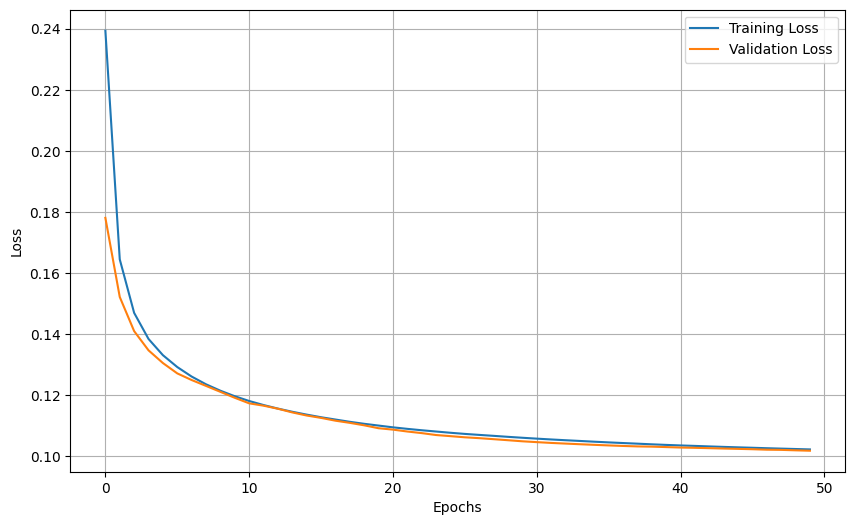

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), loss.history['loss'], label='Training Loss')
plt.plot(range(max_epochs), loss.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show();

### Exercise 1(g) (6 points)

Visualize the first 10 images from the noisy `test` data, and their corresponding denoised images.

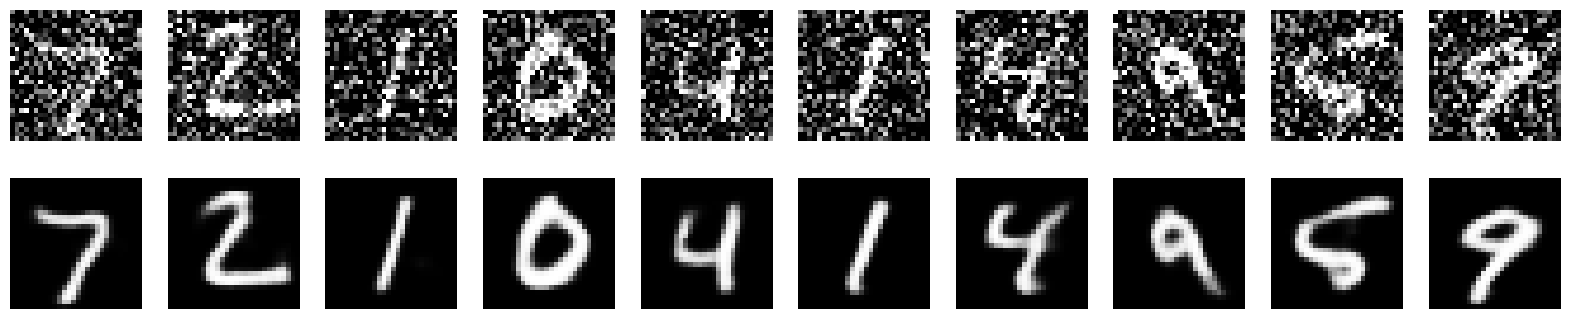

In [21]:
n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(model(x_test_noisy)[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')